In [136]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess data
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define MLP architecture
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

    def activation(self,x,type):
        if type=='sigmoid':
            return 1/(1+np.exp(-x))
        elif type=='linear':
            return x

    def activation_derivative(self,x,type):
        if(type=='sigmoid'):
            return x*(1-x)
        elif(type=='linear'):
            return 1

    def softmax(self, x):
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exps / np.sum(exps, axis=1, keepdims=True)

    def forward(self, inputs):
        self.hiddenoutput=self.bias_hidden+np.dot(inputs,self.weights_input_hidden)
        self.hiddenoutput=self.activation(self.hiddenoutput,'sigmoid')
        self.output=self.bias_output+np.dot(self.hiddenoutput,self.weights_hidden_output)
        self.output=self.activation(self.output,'sigmoid')
        return self.softmax(self.output)
    
    def backward(self,image, label, learning_rate):
        error=label-self.output
        output_delta=error*self.activation_derivative(self.output,'sigmoid')
        self.weights_hidden_output=self.weights_hidden_output+learning_rate*np.dot(self.hiddenoutput.T,output_delta)
        hidden_delta=np.dot(output_delta,self.weights_hidden_output.T)*self.activation_derivative(self.hiddenoutput,'sigmoid') 
        self.weights_input_hidden=self.weights_input_hidden+learning_rate*np.outer(image,hidden_delta)
        self.bias_hidden+=learning_rate*hidden_delta
        self.bias_output+=learning_rate*output_delta

Epoch 1/5, Loss: 0.0757
Epoch 2/5, Loss: 0.0713
Epoch 3/5, Loss: 0.0697
Epoch 4/5, Loss: 0.0692
Epoch 5/5, Loss: 0.0688


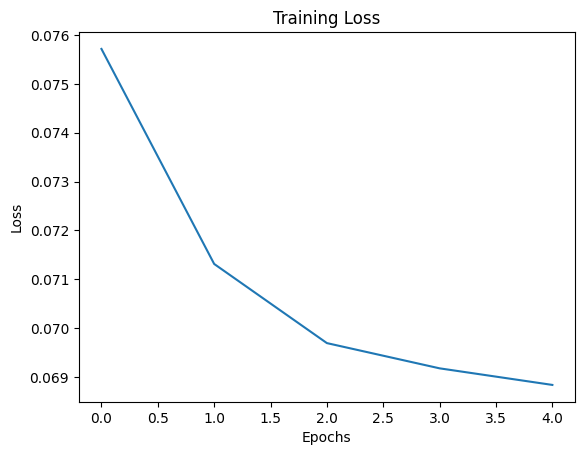

In [137]:
# Define training parameter
input_size = 784
hidden_size = 64
output_size = 10
learning_rate = 0.1
epochs = 5

# Initialize MLP
mlp = MLP(input_size, hidden_size, output_size)

losses = []
for epoch in range(epochs):
    total_loss = 0
    for image, label in zip(train_images, train_labels): 
        image = image.reshape(1, -1)
        output = mlp.forward(image)
        loss = np.mean((output - label) ** 2)
        total_loss += loss
        mlp.backward(image, label, learning_rate)
    average_loss = total_loss / len(train_images)
    losses.append(average_loss)
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {average_loss:.4f}')

# Visualize training loss
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [138]:
predicted=[]
for image in test_images: 
        image = image.reshape(1, -1)
        output = mlp.forward(image)
        predicted.append(np.argmax(output))

In [139]:
actual=[]
for label in test_labels:
    actual.append(np.argmax(test_labels))


In [140]:
def accuracy(actual,predicted):
    accurate=0
    for i in range(len(predicted)):
        if predicted[i]==actual[i]:
            accurate=accurate+1
    return accurate/len(predicted)

print('Accuracy:',accuracy(actual,predicted)*100,'%')

def precision(actual,predicted):
    precision_individual=[]
    for i in range(10):
        tp=0
        fp=0
        for j in range(len(predicted)):
            if (predicted[j]==i and actual[j]==i):
                tp=tp+1
            elif predicted[j]==i:
                fp=fp+1
            if tp+fp==0:
                temp=0
            else:
                temp=tp/(tp+fp)
        precision_individual.append(temp)
    return precision_individual

print('Precision:',precision(actual,predicted))

def recall(actual,predicted):
    recall_individual=[]
    for i in range(10):
        tp=0
        fn=0
        for j in range(len(predicted)):
            if (predicted[j]==i and actual[j]==i):
                tp=tp+1
            elif actual[j]==i:
                fn=fn+1
            if tp+fn==0:
                temp=0
            else:
                temp=tp/(tp+fn)
        recall_individual.append(temp)
    return recall_individual


print('Recall:',recall(actual,predicted))

def f1_score(precision,recall):
    f1score=[]
    for i in range(10):
        if precision[i]+recall[i]==0:
            f1score.append(0)
        else:
            f1score.append((2*precision[i]*recall[i])/(precision[i]+recall[i]))
    return f1score

print('f1-score:',f1_score(precision(actual,predicted),recall(actual,predicted)))

Accuracy: 10.190000000000001 %
Precision: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
Recall: [0, 0, 0, 0, 0, 0, 0, 0.1019, 0, 0]
f1-score: [0, 0, 0, 0, 0, 0, 0, 0.18495326254651057, 0, 0]


In [141]:
def confusionmatrix(actual,predicted):
    cm=[]
    for i in range(10):
        temp=[]
        for j in range(10):
            temp.append(sum([1 for k in range(len(predicted)) if predicted[k]==j and actual[k]==i]))
        cm.append(temp)
    return cm

cm=confusionmatrix(actual,predicted)
for row in cm:
    print(row)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1030, 1137, 982, 1050, 1025, 831, 985, 1019, 951, 990]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
